# Decision Trees

![alt text](img/if-else.png "Decision")

 ## 1. Introduction



 Decision Trees are **supervised learning algorithms** that make predictions by learning simple decision rules from data features. 
 - Mimic human decision-making through binary splits

 - Can handle both classification & regression

 - Create interpretable flowchart-like structures

 **Cool Facts:**

 1. Used in medicine for diagnosis decision pathways

 2. Basis for Random Forests and Gradient Boosting

 3. NASA used decision trees like logic for the Voyager spacecraft mission!

![alt text](img/meme_if_else.jpeg "Title")

 Consider a simple decision: determining if a person can drive.



 **Pseudo-code:**



 ```

 if age >= 18:

     can_drive = True

 else:

     can_drive = False

 ```

 This simple if-else structure forms the foundation of more complex decision rules in Decision Trees.

 ## 2. The "Play Tennis" Dataset



 We now introduce a classic small dataset: **Play Tennis**. In this dataset, we decide whether to play tennis based on weather conditions.



 **Features:**



 - **Outlook:** Sunny, Overcast, Rain.

 - **Temperature:** Hot, Mild, Cool.

 - **Humidity:** High, Normal.

 - **Wind:** Weak, Strong.



 **Target:**



 - **PlayTennis:** Yes or No.



 Let’s create a small sample dataset.

In [14]:
import pandas as pd

# Define the Play Tennis dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df_tennis = pd.DataFrame(data)
df_tennis.head()


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


![alt text](img/playtennis_dt.png "PlayTennis")

 ## 3. Entropy in Decision Trees


 - Entropy measures the uncertainity or impurity in a set of examples. 
 - In decision trees, we use entropy to decide the best feature for splitting. 
 - The formula for entropy is:


 $$ \text{Entropy}(Y) = -\sum_{i=1}^{n} p(y_i) \log_2(p(y_i)) $$



 where $p(y_i)$ is the probability of $y_i$ in the dataset.



 **Example Calculation:**



 Let’s calculate the entropy for the target variable `PlayTennis` in our dataset.

In [ ]:
import numpy as np

def entropy(labels):
    counts = np.bincount(labels)
    probabilities = counts / len(labels)
    probabilities = probabilities[probabilities > 0]
    return -np.sum(probabilities * np.log2(probabilities))
 
labels = df_tennis['PlayTennis'].map({'Yes': 1, 'No': 0}).values
total_entropy = entropy(labels)
print(f"Entropy of the PlayTennis dataset: {total_entropy:.4f}")


Entropy of the PlayTennis dataset: 0.9403


 ## 4. Key Properties of Entropy

 1. **Maximum Uncertainty** (Worst Case):

    When classes are equally distributed

    $H(S) = 1$ for 50-50 split in binary case



 2. **No Uncertainty** (Best Case):

    $H(S) = 0$ when all samples belong to one class



 3. **Geometric Interpretation**:

    Entropy curve is concave with maximum at p=0.5


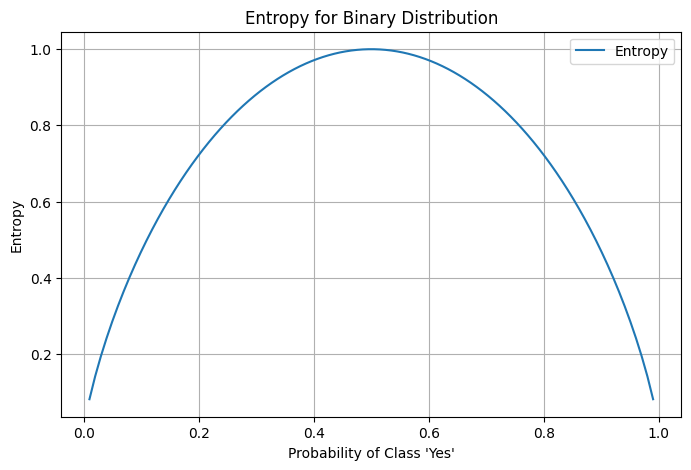

In [19]:
import matplotlib.pyplot as plt

p_values = np.linspace(0.01, 0.99, 100)
entropy_values = - (p_values * np.log2(p_values) + (1-p_values) * np.log2(1-p_values))

plt.figure(figsize=(8, 5))
plt.plot(p_values, entropy_values, label="Entropy")
plt.xlabel("Probability of Class 'Yes'")
plt.ylabel("Entropy")
plt.title("Entropy for Binary Distribution")
plt.legend()
plt.grid(True)
plt.show()


 ## 5. KL Divergence in Decision Trees

 Kullback-Leibler Divergence measures information gain between distributions:



 $$ D_{KL}(P || Q) = \sum_i P(i) \log \frac{P(i)}{Q(i)} $$



 In Decision Trees:

 - Measures reduction in entropy (information gain)

 - Used to compare parent-child node distributions

![alt](img/kl-div.png "kl")

 ## 6. Information Gain (IG)



 Information Gain is the reduction in entropy achieved after a dataset is split on an attribute. It is defined as:



 $$

 \text{IG}(Y, A) = \text{Entropy}(Y) - \sum_{v \in \text{Values}(A)} \frac{|Y_v|}{|Y|} \text{Entropy}(Y_v)
 $$




 where $S_v$ is the subset of $S$ for which attribute $A$ has value $v$.



 **Calculation on Our "Play Tennis" Dataset:**



 Let’s calculate the Information Gain for the feature **Outlook**.

In [22]:
def info_gain(df, feature, target):
    # Calculate entropy for the entire dataset
    target_vals = df[target].map({'Yes': 1, 'No': 0}).values
    total_entropy = entropy(target_vals)
    
    # Calculate weighted entropy after split
    values = df[feature].unique()
    weighted_entropy = 0
    for v in values:
        subset = df[df[feature] == v]
        subset_labels = subset[target].map({'Yes': 1, 'No': 0}).values
        weighted_entropy += (len(subset) / len(df)) * entropy(subset_labels)
    
    return total_entropy - weighted_entropy

ig_outlook = info_gain(df_tennis, 'Outlook', 'PlayTennis')
print(f"Information Gain for 'Outlook': {ig_outlook:.4f}")


Information Gain for 'Outlook': 0.2467


 ## 7. Gini Impurity: Alternative to Entropy



 Gini measures probability of misclassification:



 $$ I_G(Y) = 1 - \sum_{i=1}^k p(y_i)^2 $$



 **Geometric Relation:**

 - Both reach maximum at uniform distribution

 - Gini peaks at 0.5 vs Entropy at 1.0

In [23]:
import numpy as np

def ginni(labels):
    counts = np.bincount(labels)
    probabilities = counts / len(labels)
    probabilities = probabilities[probabilities > 0]
    return 1 - np.sum(probabilities**2)

labels = df_tennis['PlayTennis'].map({'Yes': 1, 'No': 0}).values
total_ginni = ginni(labels)
print(f"Entropy of the PlayTennis dataset: {total_entropy:.4f}")
print(f"Ginni of the PlayTennis dataset: {total_ginni:.4f}")

Entropy of the PlayTennis dataset: 0.9403
Ginni of the PlayTennis dataset: 0.4592


In [24]:
import time

start_time = time.time()
total_entropy = entropy(labels)
end_time = time.time()

print(f"Entropy Time required: {end_time - start_time:.8f} seconds")

start_time = time.time()
total_ginni = ginni(labels)
end_time = time.time()

print(f"Gini Time required: {end_time - start_time:.8f} seconds")

Entropy Time required: 0.00014591 seconds
Gini Time required: 0.00013494 seconds


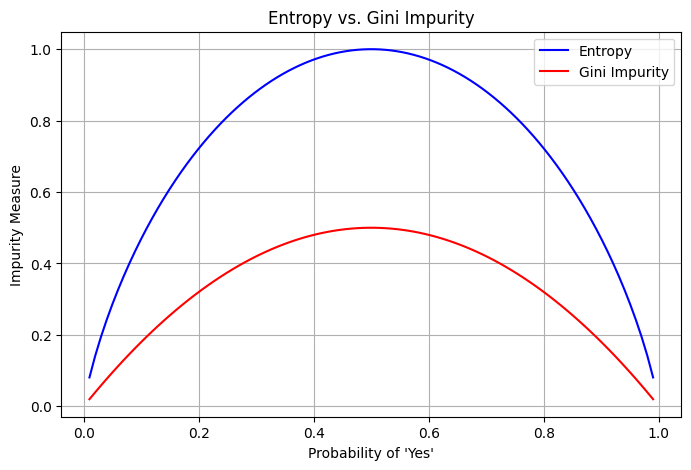

In [25]:
gini_values = 1 - (p_values**2 + (1-p_values)**2)

plt.figure(figsize=(8, 5))
plt.plot(p_values, entropy_values, label="Entropy", color='blue')
plt.plot(p_values, gini_values, label="Gini Impurity", color='red')
plt.xlabel("Probability of 'Yes'")
plt.ylabel("Impurity Measure")
plt.title("Entropy vs. Gini Impurity")
plt.legend()
plt.grid(True)
plt.show()


 ## 8. Constructing a Decision Tree

 1. **Start**: All training data at root

 2. **Split Selection**: Choose feature with max IG

 3. **Partition**: Create child nodes for each split

 4. **Recurse**: Repeat until stopping criteria met



 **Stopping Conditions**:

 - All samples same class - Pure Node

 - Max depth reached

 - Minimum samples per node

Depth of the Tree -> Hyperparameter in Decision Tree

 ## 9. Overfitting and Underfitting in Decision Trees



 **Overfitting:**



 - Occurs when the tree becomes too complex and captures noise in the training data.

 - It performs very well on training data but poorly on unseen data.

 - Remedies include limiting tree depth, setting minimum samples per leaf, or using pruning techniques.



 **Underfitting:**



 - Happens when the tree is too simple to capture the underlying patterns in the data.

 - It results in high bias and poor performance on both training and test sets.

 - Remedy by allowing more complexity (e.g., increasing tree depth or reducing regularization).



 Finding the right balance between the two is key for good model performance.

 ## 10. Regression Using Decision Trees



 Decision Trees can also be used for regression tasks. Instead of classifying, the tree predicts a continuous value by averaging the target values in a leaf node.



 **Example:**



 We can use scikit-learn’s `DecisionTreeRegressor` to predict a continuous outcome (like house prices) by following the same splitting principles but using a different criterion (e.g., mean squared error).

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Create a small synthetic regression dataset
np.random.seed(42)
X_reg = np.linspace(0, 10, 100).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.2, 100)

# Fit a Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=None, random_state=42)
regressor.fit(X_reg, y_reg)

# Predict and plot results
y_pred_reg = regressor.predict(X_reg)

plt.figure(figsize=(8, 5))
plt.scatter(X_reg, y_reg, label="Data", color='lightblue')
plt.plot(X_reg, y_pred_reg, label="Decision Tree Regression", color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Decision Tree Regression Example")
plt.legend()
plt.show()




## References

- https://github.com/luelhagos/Play-Tennis-Implementation-Using-Sklearn-Decision-Tree-Algorithm/blob/master/Play%20Tennis%20%20Implementation%20Using%20Sklearn%20Decision%20Tree%20Algorithm.ipynb
- https://www.researchgate.net/publication/328382220_Privacy_Preserving_Medical_Data_Analytics_using_Secure_Multi_Party_Computation_An_End-To-End_Use_Case
- https://jessicastringham.net/2018/12/27/KL-Divergence
- https://cs.uwaterloo.ca/~a23gao/cs486686_f18/slides/lec19_decision_trees_typednotes.pdf